In [2]:
%matplotlib inline
import os
import pickle

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

from pyxel import Image, load_region
from pyxel.models import BrokenPow, IntModel
from pyxel.fitters import CstatFitter

In [10]:
pkl = 'profile-core-ell.pkl'

if os.path.exists(pkl):
    with open(pkl, 'rb') as f:
        p = pickle.load(f)
else:
    # Read the images used to create the surface brightness profile.
    src_img = Image(["srcfree_bin4_500-4000_1655_band1_thresh.img",
                     "srcfree_bin4_500-4000_4200_band1_thresh.img",
                     "srcfree_bin4_500-4000_16235_band1_thresh.img",
                     "srcfree_bin4_500-4000_16305_band1_thresh.img"])
    exp_img = Image(["srcfree_bin4_500-4000_1655_thresh.expmap_nosrcedg",
                     "srcfree_bin4_500-4000_4200_thresh.expmap_nosrcedg",
                     "srcfree_bin4_500-4000_16235_thresh.expmap_nosrcedg",
                     "srcfree_bin4_500-4000_16305_thresh.expmap_nosrcedg"])
    bkg_img = Image(["1655_bin4_500-4000_bgstow_goodreg.img",
                     "4200_bin4_500-4000_bgstow_goodreg.img",
                     "16235_bin4_500-4000_bgstow_goodreg.img",
                     "16305_bin4_500-4000_bgstow_goodreg.img"])

    # Read the region file in which the surface brightness profile will be created.
    region = load_region("core_ell_alt.reg")
    # region = load_region("core_sx_ell.reg")

    # Create the profile and bin it to a minimum of 100 counts/bin
    p = region.sb_profile(src_img, bkg_img, exp_img,
                          min_counts=5, islog=False)
    with open(pkl, 'wb') as f:
        pickle.dump(p, f)

Region loaded. Its shape and parameters are listed below: 
epanda [472.88872, 403.21583, 88.907077, 146.85668, 1.0, 0.0, 0.0, 60.62656, 39.544543, 1.0, 359.99968]


In [19]:
rmin = 0.4
rmax = 1.0

r = np.array([pp[0] for pp in p if rmax >= pp[0] >= rmin])
r_err = np.array([pp[1] for pp in p if rmax >= pp[0] >= rmin])
raw_cts = np.array([pp[2] for pp in p if rmax >= pp[0] >= rmin])
bkg_cts = np.array([pp[4] for pp in p if rmax >= pp[0] >= rmin])
sx = np.array([pp[7] for pp in p if rmax >= pp[0] >= rmin])
sx_err = np.array([pp[8] for pp in p if rmax >= pp[0] >= rmin])
bkg = np.array([pp[9] for pp in p if rmax >= pp[0] >= rmin])
bkg_err = np.array([pp[10] for pp in p if rmax >= pp[0] >= rmin])
t_raw = np.array([pp[11] for pp in p if rmax >= pp[0] >= rmin])
t_bkg = np.array([pp[12] for pp in p if rmax >= pp[0] >= rmin])

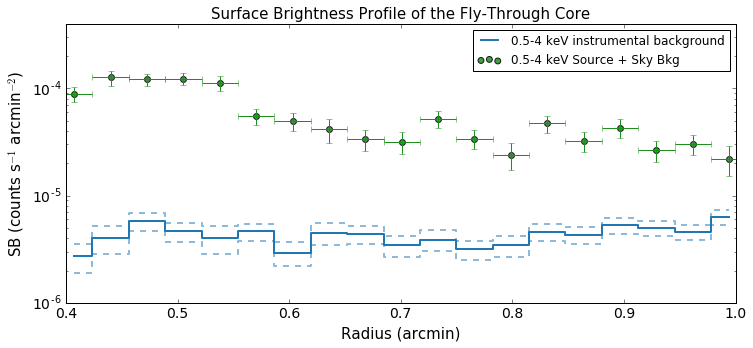

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.dpi = 300
fig.set_size_inches(12, 5)

ax.scatter(r, sx, c="#1e8f1e", alpha=0.85, s=35, marker="o",
           label="0.5-4 keV Source + Sky Bkg")
ax.errorbar(r, sx, xerr=r_err, yerr=sx_err, linestyle="None", color="#1e8f1e")
ax.step(r, bkg, where="mid", color="#1f77b4", linewidth=2,
        label="0.5-4 keV instrumental background")
ax.step(r, bkg - bkg_err, where="mid", color="#1f77b4", linewidth=2, alpha=0.5, linestyle="--")
ax.step(r, bkg + bkg_err, where="mid", color="#1f77b4", linewidth=2, alpha=0.5, linestyle="--")

ax.semilogy()
ax.get_xaxis().set_major_formatter(mtick.ScalarFormatter())
ax.get_xaxis().set_minor_formatter(mtick.ScalarFormatter())
ax.get_yaxis().set_major_formatter(mtick.LogFormatterMathtext())
#ax.get_yaxis().set_minor_formatter(mtick.FormatStrFormatter("%.0e"))
plt.tick_params(axis="both", which="major", labelsize=14)
plt.tick_params(axis="both", which="minor", labelsize=14)
plt.xlim(rmin, rmax)
plt.ylim(1e-6, 4e-4)
plt.xlabel("Radius (arcmin)", size=15)
plt.ylabel(r"SB (counts s$^{-1}$ arcmin$^{-2}$)", size=15)
plt.legend(loc=1)
plt.title("Surface Brightness Profile of the Fly-Through Core", size=15)
plt.show()

In [23]:
mod = IntModel(BrokenPow)(widths=r_err, ind1=-3.0, ind2=0.8, norm=4.7e-4, rbreak=0.55, 
                          jump=3.0, const=1.24166921045e-06)
mod.const.fixed = True

fit = CstatFitter()
m = fit(mod, r, raw_cts, bkg_cts, t_raw, t_bkg, maxiter=500)
print(m)
print(fit.fit_info)

23035


//anaconda/lib/python3.5/site-packages/scipy/optimize/_minimize.py:381: RuntimeWarning: Method nelder-mead does not use gradient information (jac).
  RuntimeWarning)
/Users/gogrean/code/pyxel/pyxel/optimizers.py:97: OptimizeWarning: Unknown solver options: eps, factr
  args=fargs, tol=acc, **kwargs)


Model: MyIntModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
         ind1           ind2      ...      jump           const      
    -------------- -------------- ... ------------- -----------------
    -3.85373204443 0.951988200213 ... 3.44239881766 1.24166921045e-06
{'exit_mode': 0, 'numiter': 310, 'message': 'Optimization terminated successfully.', 'final_func_val': 14.502698230798405, 'num_function_calls': None}





FIT SUMMARY:

| Parameter   |      Value |   Lower Uncertainty |   Upper Uncertainty |
|-------------+------------+---------------------+---------------------|
| ind1        | -4.549e+00 |          -1.510e+00 |           1.253e+00 |
| ind2        |  1.045e+00 |          -1.001e-01 |           1.124e-01 |
| norm        |  6.342e-04 |          -1.180e-04 |           1.467e-04 |
| rbreak      |  5.552e-01 |          -9.121e-03 |           1.149e-02 |
| jump        |  3.271e+00 |          -4.576e-01 |           4.366e-01 |





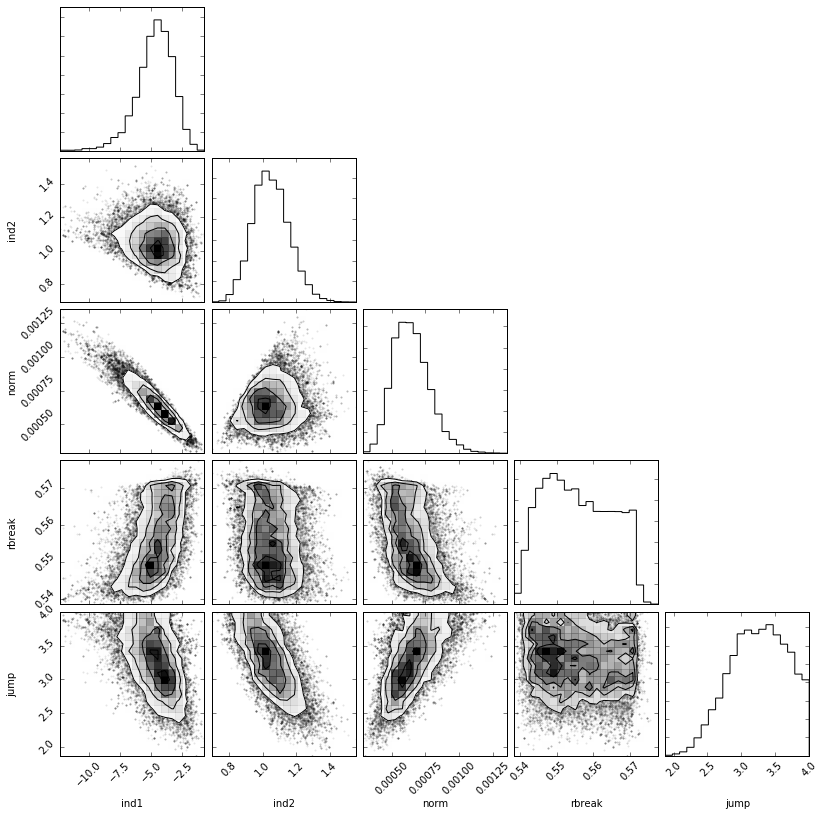

In [25]:
mc_mod = BrokenPow(*m.parameters)
mc_mod.const.fixed = True
fitted_params = fit.mcmc_err(mc_mod, r, raw_cts, bkg_cts, t_raw, t_bkg,
                             cl=68.269, save_chain=True, clobber_chain=True)